# Scraping Booking
------
Obteniendo la información de todos los hoteles disponibles en la Ciudad de México, datos recolectados de la página Booking.com

Este manual te mostrara como realizar scraping de la información disponible en la página Booking.com para hoteles en la CDMX, usando Python y Selectorlib.

## ¿Como hacer scraping en Booking?

* Busca en Booking.com hoteles con tus condiciones como localización, Ckeck in Date, Check Out Date, Cuartos, Numero de personas, etc. 
* Copia la información que ingresaste.
* Ingresa esta información en el scrape.py (se muestra más adelante).
* El Scraping descargara este link automáticamente.
* Entonces obtendremos el HTML usando Selenium y Selectorlib Template para extraer campos como Nombre, Coordenadas, Cuartos, etc.
* El Scraper guardara los datos en un archivo CSV.

Este Scraper obtendrá los siguientes datos (puedes agregar más campos si lo deseas).

* Nombre del Hotel
* Dirección del Hotel
* Precio del Hotel
* Precio sin Descuento 
* Puntaje
* Calificación
* Tipo de Cuarto
* Impuestos
* Cantidad de Camas
* Huéspedes 
* Comentarios
* Coordenadas


## Instala los paquetes necesarios para correr el Scraper de Booking
Necesitaremos los siguientes paquetes para realizar el Scraping

1.- Selenium, para hacer request y descargar el contenido HTML del link de Booking.

2.- SelectorLib, paquetería de Python para extraer datos usando el archivo YAML que crearemos con la extensión de Google.

In [1]:
! pip install selectorlib
! pip install selenium

# El código
----
Creamos el folder del proyecto llamándolo Booking_scraping, en el folder añade un archivo .py con nombre scrape.py. Copia el código de abajo a ese archivo.

In [2]:
! pip install maya

  Using cached tzlocal-4.1-py3-none-any.whl (19 kB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Using cached tzdata-2021.5-py2.py3-none-any.whl (339 kB)
  Created wheel for snaptime: filename=snaptime-0.2.4-py3-none-any.whl size=3594 sha256=713e8087889135d2f431057198c984058f44108aa73332e8e12bef24e6f69a4c
  Stored in directory: c:\users\pata_\appdata\local\pip\cache\wheels\ef\75\ba\deb00489e86fe8ed045887958363a3ddf664227d0bab7f03a2
Successfully built snaptime


In [1]:
print('Las reservaciones deben ser menores a 30 días. Los días y meses deben ser escritos con números')


# Datos de entrada para que Booking nos muestre los precios por fecha y huespedes
ch_y = '2021'
ch_m = input('Mes de entrada: ')
while ch_m.isdigit()==False:
    print("escribiste letras, escribe con número el mes")
    ch_m = input('Mes de entrada: ')
ch_d =input('Día de entrada: ')
while ch_d.isdigit()==False:
    print("escribiste letras, escribe con número el día")
    ch_d = input('Día de entrada: ')

co_y = '2021'
co_m = input('Mes de salida: ')
while co_m.isdigit()==False:
    print("escribiste letras, escribe con número el mes")
    co_m = input('Mes de salida: ')
co_d = input('Día de salida: ')
while co_d.isdigit()==False:
    print("escribiste letras, escribe con número el día")
    co_d = input('día de entrada: ')


#n_adlt = input('Adultos: ')
n_adlt = '2'


from time import sleep
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time

import random
import selectorlib
from selectorlib import Extractor
from selenium import webdriver
import time
import pandas as pd

options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')
options.add_argument('--disable-extensions')


PATH = r"D:\Documentos\Inteligencia Fsical\webscrapping\booking\chromedriver.exe"
driver = webdriver.Chrome(PATH, options=options) # Navegador a usar 


#Numero de registros que se usarán
driver.get('https://www.booking.com/searchresults.es-mx.html?aid=375648&label=msn-b3YDyMo0k8Dj47_gBBiUxA-80470542858153%3Atikwd'+
       '-80470558197349%3Aloc-119%3Aneo%3Amte%3Adec%3Aqsbooking&sid=879aa0e7594d497286f4b18dc15ff64b&sb=1&src=searchresults&src'+
       '_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Fsearchresults.es-mx.html%3Faid%3D375648%3Blabel%3Dmsn-b3YDyMo0k8Dj47_'+
       'gBBiUxA-80470542858153%253Atikwd-80470558197349%253Aloc-119%253Aneo%253Amte%253Adec%253Aqsbooking%3Bsid%3D879aa0e7594d4972'+
       '86f4b18dc15ff64b%3Btmpl%3Dsearchresults%3Bac_click_type%3Db%3Bac_position%3D0%3Bcheckin_month%3D'+str(ch_m)+
       '%3Bcheckin_monthday%3D'+str(ch_d)+'%3Bcheckin_year%3D'+str(ch_y)+'%3Bcheckout_month%3D'+str(co_m)+
       '%3Bcheckout_monthday%3D'+str(co_d)+'%3Bcheckout_year%3D'+co_y+
       '%3Bclass_interval%3D1%3Bdest_id%3D-1658079%3Bdest_type%3Dcity%3Bdtdisc%3D0%3Bfrom_sf%3D1%3Bgroup_adults%3D1%3Bgroup_'+
       'children%3D0%3Biata%3DMEX%3Binac%3D0%3Bindex_postcard%3D0%3Blabel_click%3Dundef%3Bno_rooms%3D1%3Boffset%3D0%3Bpostcard%3D0%3B'+
       'raw_dest_type%3Dcity%3Broom1%3DA%3Brows%3D25%3Bsb_price_type%3Dtotal%3Bsearch_selected%3D1%3Bshw_aparth%3D1%3Bslp_r_'+
       'match%3D0%3Bsrc%3Dindex%3Bsrc_elem%3Dsb%3Bsrpvid%3D6dc989dd88cd0220%3Bss%3DCiudad%2520de%2520M%25C3%25A9xico%252C%2520'+
       'M%25C3%25A9xico%2520DF%252C%2520M%25C3%25A9xico%3Bss_all%3D0%3Bss_raw%3Dciudad%2520de%3Bssb%3Dempty%3Bsshis%3D0%3Btop'+
       '_ufis%3D1%26%3B&ss=Ciudad+de+M%C3%A9xico&is_ski_area=0&ssne=Ciudad+de+M%C3%A9xico&ssne_untouched=Ciudad+de+M%C3%A9xico&'+
       'city=-1658079&checkin_year='+str(ch_y)+'&checkin_month='+str(ch_m)+'&checkin_monthday='+
       str(ch_d)+'&checkout_year='+str(co_y)+'&checkout_month='+str(co_m)+'&checkout_monthday='+
       str(co_d)+'&group_adults='+str(n_adlt)+'&group_children=0&no_rooms=1&sb_changed_dates=1&from_sf=1')

registro = driver.find_element_by_xpath('//h1[@class="_30227359d _0db903e42"]')
registro = registro.text
registro
reg=[]
reg.append(registro)
reg=pd.DataFrame(reg)
reg= reg.replace(" alojamientos encontrados","", regex=True)
reg= reg.replace("Ciudad de México: ","", regex=True)
reg= reg.replace(",","", regex=True)
reg=pd.to_numeric(reg[0])[0]

# Url princiapl de la pagina Booking que ya contiene la informacion sobre CDMX, a este link se 
# le agregan los datos del primer paso, para obtener los resultados deseados 

url = ['https://www.booking.com/searchresults.es-mx.html?aid=375648&label=msn-b3YDyMo0k8Dj47_gBBiUxA-80470542858153%3Atikwd'+
       '-80470558197349%3Aloc-119%3Aneo%3Amte%3Adec%3Aqsbooking&sid=879aa0e7594d497286f4b18dc15ff64b&sb=1&src=searchresults&src'+
       '_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Fsearchresults.es-mx.html%3Faid%3D375648%3Blabel%3Dmsn-b3YDyMo0k8Dj47_'+
       'gBBiUxA-80470542858153%253Atikwd-80470558197349%253Aloc-119%253Aneo%253Amte%253Adec%253Aqsbooking%3Bsid%3D879aa0e7594d4972'+
       '86f4b18dc15ff64b%3Btmpl%3Dsearchresults%3Bac_click_type%3Db%3Bac_position%3D0%3Bcheckin_month%3D'+str(ch_m)+
       '%3Bcheckin_monthday%3D'+str(ch_d)+'%3Bcheckin_year%3D'+str(ch_y)+'%3Bcheckout_month%3D'+str(co_m)+
       '%3Bcheckout_monthday%3D'+str(co_d)+'%3Bcheckout_year%3D'+co_y+
       '%3Bclass_interval%3D1%3Bdest_id%3D-1658079%3Bdest_type%3Dcity%3Bdtdisc%3D0%3Bfrom_sf%3D1%3Bgroup_adults%3D1%3Bgroup_'+
       'children%3D0%3Biata%3DMEX%3Binac%3D0%3Bindex_postcard%3D0%3Blabel_click%3Dundef%3Bno_rooms%3D1%3Boffset%3D0%3Bpostcard%3D0%3B'+
       'raw_dest_type%3Dcity%3Broom1%3DA%3Brows%3D25%3Bsb_price_type%3Dtotal%3Bsearch_selected%3D1%3Bshw_aparth%3D1%3Bslp_r_'+
       'match%3D0%3Bsrc%3Dindex%3Bsrc_elem%3Dsb%3Bsrpvid%3D6dc989dd88cd0220%3Bss%3DCiudad%2520de%2520M%25C3%25A9xico%252C%2520'+
       'M%25C3%25A9xico%2520DF%252C%2520M%25C3%25A9xico%3Bss_all%3D0%3Bss_raw%3Dciudad%2520de%3Bssb%3Dempty%3Bsshis%3D0%3Btop'+
       '_ufis%3D1%26%3B&ss=Ciudad+de+M%C3%A9xico&is_ski_area=0&ssne=Ciudad+de+M%C3%A9xico&ssne_untouched=Ciudad+de+M%C3%A9xico&'+
       'city=-1658079&checkin_year='+str(ch_y)+'&checkin_month='+str(ch_m)+'&checkin_monthday='+
       str(ch_d)+'&checkout_year='+str(co_y)+'&checkout_month='+str(co_m)+'&checkout_monthday='+
       str(co_d)+'&group_adults='+str(n_adlt)+'&group_children=0&no_rooms=1&sb_changed_dates=1&from_sf=1']

# Lista donde se guardaran todos los links de la pagina Booking
l = []


# Booking muestra 25 hoteles por pagina, entonces cargaremos 25 hoteles por link, /
# cambiando el valor "set" del link y añadiendo la informacion del paso 1
for pages in range(25,reg+25,25):

    urls = 'https://www.booking.com/searchresults.es-mx.html?aid=375648&label=msn-b3YDyMo0k8Dj47_gBBiUxA-80470542858153%3Atikwd-80470558197349%3Aloc-119%3Aneo%3Amte%3Adec%3Aqsbooking&sid=879aa0e7594d497286f4b18dc15ff64b&tmpl=searchresults&checkin_month='+str(ch_m)+'&checkin_monthday='+str(ch_d)+'&checkin_year='+str(ch_y)+'&checkout_month='+str(co_m)+'&checkout_monthday='+str(co_d)+'&checkout_year='+str(co_y)+'&city=-1658079&class_interval=1&dest_id=-1658079&dest_type=city&dtdisc=0&from_sf=1&group_adults='+str(n_adlt)+'&group_children=0&inac=0&index_postcard=0&label_click=undef&no_rooms=1&postcard=0&room1=A%2CA&sb_price_type=total&shw_aparth=1&slp_r_match=0&src=searchresults&src_elem=sb&srpvid=2e79718f93550095&ss=Ciudad%20de%20M%C3%A9xico&ss_all=0&ssb=empty&sshis=0&ssne=Ciudad%20de%20M%C3%A9xico&ssne_untouched=Ciudad%20de%20M%C3%A9xico&top_ufis=1&rows=25&offset=' + str(pages)
    
    l.append(urls) # Se guardan todos los links generados en la lista l

# Lista final donde se encuentran todos los link de Booking, se suman el link principal y todos los links generados
urls = url + l

# Lista donde se guardaran los datos de los hoteles en formato Dict
hoteles = []


# Se recorren todos los links
for i in range(len(urls)):
    
    # Selenium nos lleva a cada link
    driver.get(urls[i])

    #Tiempo de espera aleatorio para que cargue la pag
    time.sleep(random.uniform(.1,3.75))

    # Obtenemos el HTML del driver, extraemos la informacion con SelectorLib Extractor.
    raw_html = driver.page_source # HTML de la pag
    extracted_text = Extractor.from_yaml_file('booking.yml') # Extraccion de la info 

    raw_data = extracted_text.extract(raw_html) # Datos en crudo

    data = raw_data['Hotel'] # Guardamos la informacion de los hoteles
    hoteles.append(data) # Se guarda la info en la lista hoteles

#Informacion de la primer pagina en formato Dic
#print(hoteles[0])

#Lista donde se guardaran todos los Df con la informacion
u = []


# Recorremos todos los dict y los transformamos en df
for j in range(len(urls)):
    
    df = pd.DataFrame.from_dict(hoteles[j])
    u.append(df)

df = pd.concat(u) #Union de todos los df

l = df.columns.values


# Limpiamos los df, ya que cada celda era una lista y podria dar problemas
for i in range(len(l)):
    df[l[i]] = df[l[i]].apply(pd.Series)

    
df["Price"]=df["Price"].str[4:]  
df["Discount"]=df["Discount"].str[4:]
df['Tax'] = df['Tax'].str[6:]

df['Price'] = df['Price'].replace(',','', regex=True)
df['Tax'] = df['Tax'].replace('de impuestos y cargos', '', regex=True)
df['Tax'] = df['Tax'].replace('e impuestos y cargos', '', regex=True)
df['Tax'] = df['Tax'].replace(',', '', regex=True)
df['Coments'] = df['Coments'].replace('comentarios', '', regex=True)
df['Discount'] = df['Discount'].replace(',', '', regex=True)
df['Coments'] = df['Coments'].replace(',', '', regex=True)
df['Coments'] = df['Coments'].replace('externos', '', regex=True)
df["Bed"]= df["Bed"].replace("\n", "", regex=True)

#A, B = df["Cor"].str.split(",", 1).str
#df["coordenadas"]= B+","+A
#df=df.drop(["Cor","Stars"], axis=1)

df['Price'] = pd.to_numeric(df['Price'])
df['Tax'] = pd.to_numeric(df['Tax'])
df['Coments'] = pd.to_numeric(df['Coments'])
df['Discount'] = pd.to_numeric(df['Discount'])
   
df

df.describe()

from datetime import date, datetime

today = date.today()
#dd/mm/YY

f_consulta = today.strftime("%d/%m/%Y")

df["Consulta"] = f_consulta

d_e = str(ch_d)+'/'+str(ch_m)+'/2021'

import maya
d_e = maya.parse(d_e).datetime(naive=False)

df["Entrada"] = d_e.date()

d_s = str(co_d)+'/'+str(co_m)+'/2021'
d_s = maya.parse(d_s).datetime(naive=False)

df["Salida"] = d_s.date()

df["Estancia"] = 1

#df.to_excel('booking_month'+str(ch_m)+'_day'+str(ch_d)+'_emonth'+str(co_m)+'_eday'+str(co_d)+'.xlsx',
#         index=False, encoding="utf-16")

driver.quit()
print('Se obtuvo la informacion conexito!!!')

Las reservaciones deben ser menores a 30 días. Los días y meses deben ser escritos con números
Mes de entrada: 12
Día de entrada: 23
Mes de salida: 12
Día de salida: 30


<ipython-input-1-3129a588cab2>:50: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options) # Navegador a usar
<ipython-input-1-3129a588cab2>:71: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  registro = driver.find_element_by_xpath('//h1[@class="_30227359d _0db903e42"]')


ValueError: Unable to parse string "5  externos" at position 276

In [6]:
df

,Hotel_name,Location,Price,Discount,Rating_n,Rating,Type_room,Tax,Bed,Guest,Coments,coments
0,Hostal Regina Down Town Mexico City,"Centro histórico de México D.F., Ciudad de México",4195.0,3985,9.2,Fantástico,Habitación Doble Estándar con baño compartido,818.0,2 camas matrimoniales,"7 noches, 2 adultos",930,930.0
1,Ibis Mexico Alameda,"Centro histórico de México D.F., Ciudad de México",NaN,8781,7.8,Bien,Habitación Estándar - 1 cama grande,1712.0,1 cama matrimonial,"7 noches, 2 adultos",2653,2653.0
2,Hyatt House Mexico City Santa Fe,"Santa Fe, Ciudad de México",NaN,9590,8.9,Fabuloso,Habitación Estándar - Cama extragrande,1870.0,1 cama King size,"7 noches, 2 adultos",591,591.0
3,NH Collection México City Centro Histórico,"Centro histórico de México D.F., Ciudad de México",NaN,8028,8.7,Fabuloso,Habitación Doble Premium - 1 o 2 camas,1566.0,Camas: 1 doble o 2 individuales,"7 noches, 2 adultos",701,701.0
4,Hotel Metropol,"Centro histórico de México D.F., Ciudad de México",NaN,6741,8.4,Muy bien,Habitación Estándar - 1 cama grande,1314.0,1 cama matrimonial,"7 noches, 2 adultos",832,832.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12,Ilivedorms,Ciudad de México,NaN,7700,7.8,Bien,Estudio con 1 cama grande,1502.0,2 suites privadas,"7 noches, 2 adultos",12,12.0
13,Hotel de Mexico BelAir Collection,"Nápoles, Ciudad de México",NaN,26036,8.7,Fabuloso,Habitación Individual Estándar,5077.0,2 camas individuales,"7 noches, 2 adultos",339,339.0
14,Mambú Hostal,"Venustiano Carranza, Ciudad de México",4900.0,4190,NaN,NaN,Habitación Individual,860.0,2 camas individuales,"7 noches, 2 adultos",NaN,NaN
15,Roof top apartment,"Coyoacán, Ciudad de México",8332.0,7915,NaN,NaN,Apartamento de 1 dormitorio,1625.0,2 departamentos completos • 2 recámaras • 2 baños,"7 noches, 2 adultos",NaN,NaN


In [8]:
df.describe()

,Price,Tax,coments
count,574.000000,829.000000,647.000000
mean,16697.388502,2896.197829,380.493045
std,33703.814599,6682.284188,648.259603
min,723.000000,57.000000,3.000000
25%,6176.500000,1054.000000,28.000000
50%,10290.000000,1593.000000,131.000000
75%,17850.000000,2877.000000,479.000000
max,437757.000000,104268.000000,9204.000000


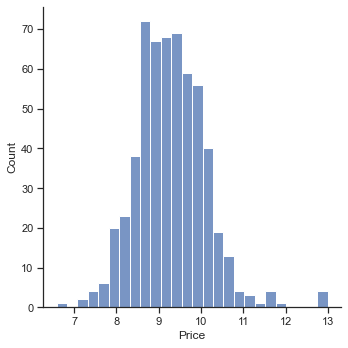

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.displot(np.log(df['Price']),kde = False)
plt.show()

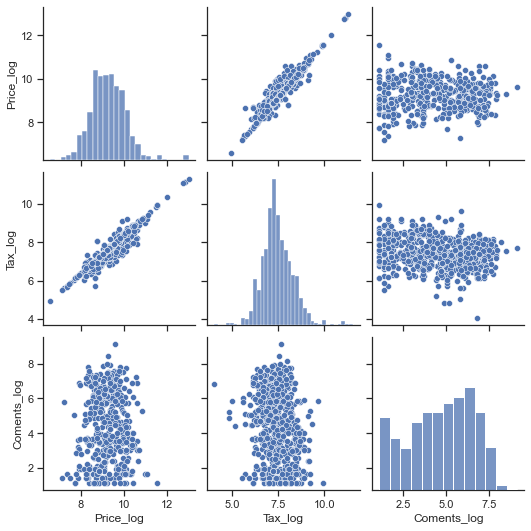

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

df['Price_log'] = np.log(df['Price'])
df['Tax_log'] = np.log(df['Tax'])
df['Coments_log'] = np.log(df['coments'])


sns.pairplot(df[['Price_log', 'Tax_log', 'Coments_log']])


El código de arriba hará lo siguiente:
* Te pedirá los datos necesarios para realizar tu búsqueda de hoteles.
* Definirá el navegador a usar, en este caso Chrome.
* Ira a la página de Booking.com con la información proporcionada y guardara el enlace.
* Guardara todas las páginas con resultados de Booking.com.
* Ira a cada uno de los links que guardo y obtendrá el código HTML.
* Extraerá solo los datos solicitados y los guardará en formato Dict.
* Convertirá esos Dict a DF, para una exportación más sencilla.
* Guardara el DF como archivo .csv.

## Crear el Selectorlib Template para realizar el Scraping en Booking.com
---
Notaras que en el código de arriba hay un archivo llamado `Booking_c.YML` este archivo hará el código más simple y conciso. Todo gracias a la herramienta de Web Sraping Selectorlib.

Selectorlib es una herramienta que hace la selección, remarcado y extracción de datos de páginas web más fácil y visual. La extensión Selectorlib de Google te permite marcar los datos que necesitas, crea los selectores CSS o los XPATH necesarios para extraer los datos. Y al final obtener una vista preliminar de los mismos.

Puedes leer más del uso de Selectorlib aquí https://selectorlib.com/getting-started.html.


Aquí se muestra como marcamos los campos de los datos que necesitamos extraer usando la extensión de Google Selectorlib.

![alt text](images/photo4945146201708276099.jpg)

Una vez que creaste el template, da click en 'Highlight' para remarcar y tener una vista previa de todos tus selectores. Finalmente, da click en 'Export', descarga el archivo YAML y ese archivo es el archivo Booking_c.yml.

![alt text](images/photo4945146201708276100.jpg)

En resumen este programa tiene la capacidad de acceder a los datos de interés de la página de booking. Es un trabajo que requiere primero obtener los datos desde la inspección de la página, a la par que se usa Selectorlib; una vez que se ha recolectado la información requerida, es imperativo guardarla en un formato "yml", de manera que sea compatible con el programa y las librerías de Python. No olvidar instalar las librerías de Selenium y Selectorlib, pues son los pilares del código.
Al introducir los datos de meses y días, se debe tener cuidado de introducir fechas coherentes, pues de poner fechas previas al día que se está usando el programa, regresará un error.
El programa correrá de tal manera que recolectará la información de cada hotel, página por página, hasta llegar al último hotel; creará un data frame con las siguientes columnas:
Hotel_name, el nombre del hotel; Location, su dirección; Price, el precio; Discount, el descuento, si es que se aplica; Rating_n, la calificación numérica; Rating, calificación categórica; Type_room, tipo de cuarto; Tax, el impuesto que se pueda aplicar; Bed, tipo y cantidad de camas; Guest, noche y cantidad de adultos y Coments, los comentarios de quienes han usado el hotel.
Al final se obtendrá un data frame con el nombre "df" junto con su descripción de estadísticos.

Así es como se ve nuestro Template de Booking.com.

![alt text](images/photo4945146201708276101.jpg)

## Corriendo el Scraping
---
* Para correr el scraping ve a booking.com, busca los hoteles que necesitas, guarda la información que ingresaste.

* Corre el archivo .py que creaste.
Este paso dependerá mucho del IDE que uses para correr Python, yo recomiendo los siguientes:
    1.	Spyder
    2.	JupyterNotebook
    3.	Pycharm
    4.	Google Colab

Los primeros 2 los encuentras en tu entorno Anaconda.

* Agrega la información que guardaste de los hoteles cuando te la solicite el programa.

* Espera a que el programa busque todos los links.

* Visualiza los resultados.

Si estas usando Jupyter Notebooks (como este archivo) puedes correr el programa aquí mismo, dando click a la celda donde se encuentre el código y presiona `shift + enter`. El programa correrá, te pedirá la información necesaria y cuando termine mostrará los resultados en el notebook.
Si estas viendo el archivo markdown no será posible correr el código aquí. 

Aquí hay un ejemplo de los datos que da el programa.


![alt text](images/photo4945146201708276102.jpg)

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
